In [1]:
from QPCA.decomposition.Qpca import QPCA
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, transpile, execute,assemble
from qiskit.visualization import plot_bloch_multivector,plot_histogram,array_to_latex
import matplotlib.pyplot as plt
import random
from qiskit.extensions import UnitaryGate
from QPCA.preprocessingUtilities.preprocessing_matrix_utilities import generate_matrix
from QPCA.quantumUtilities.quantum_utilities import thetas_computation,from_binary_tree_to_qcircuit,state_vector_tomography

# General use case of tomography 

Here we show that our tomography implementation can be used in general to estimate any quantum circuit' statevectors.

In [2]:
qc=QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.h(1)

qc.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     ├───┤└───┘
q_1: ┤ H ├─────
     └───┘

In [4]:
aer=Aer.get_backend('statevector_simulator')
statevector=aer.run(transpile(qc,aer)).result().get_statevector()
array_to_latex(statevector)

<IPython.core.display.Latex object>

In [6]:
state_vector_tomography(qc,n_shots=8000,qubits_to_be_measured=[0])

{'0': 0.7075485849042453, '1': -0.7066647012551285}

We can specify the qubits that you want to reconstruct (or measure) and if drawing the circuit that implements the tomography

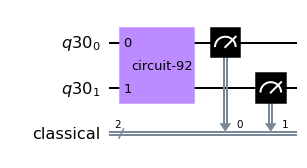

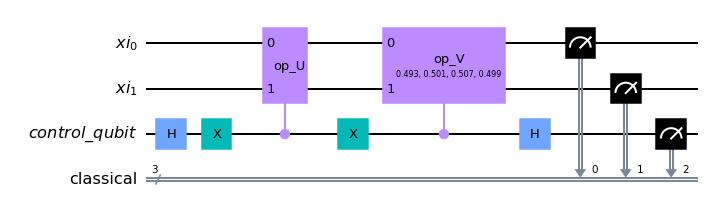

{'00': 0.4930770730829005,
 '01': -0.501373114556415,
 '10': 0.50658168146904,
 '11': -0.4988737315193094}

In [7]:
state_vector_tomography(qc,n_shots=8000,drawing_amplitude_circuit=True,drawing_sign_circuit=True)

# Qpca class usability

In [7]:
resolution=10
matrix_dimension=3
lista=list(range(0,2**resolution))
#eigenvalues_list=[0.65,0.25,0.06,0.04]


In [8]:
#4747
seed=190
input_matrix=generate_matrix(matrix_dimension=matrix_dimension,replicate_paper=False,seed=seed)#,eigenvalues_list=eigenvalues_list)

Matrix:
 [[1.38 1.6  1.29]
 [1.6  1.9  1.56]
 [1.29 1.56 1.37]]

eigenvalue: 0.09156843360568682 - eigenvector: [-0.576 -0.178  0.798]
eigenvalue: 0.009101458142892491 - eigenvector: [-0.61   0.743 -0.275]
eigenvalue: 4.5420634695246465 - eigenvector: [-0.544 -0.645 -0.537]


In [9]:
qpca=QPCA().fit(input_matrix,resolution=resolution)

In [10]:
np.linalg.eig(qpca.input_matrix),qpca.input_matrix

((array([0.97831668, 0.00196037, 0.01972296, 0.        ]),
  array([[-0.54387379, -0.61004165, -0.57623822,  0.        ],
         [-0.64480462,  0.74326569, -0.17827818,  0.        ],
         [-0.53705522, -0.27460023,  0.7976004 ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])),
 array([[0.29666337, 0.34422543, 0.27702034, 0.        ],
        [0.34422543, 0.4084675 , 0.33558223, 0.        ],
        [0.27702034, 0.33558223, 0.29486913, 0.        ],
        [0.        , 0.        , 0.        , 0.        ]]))

[0.810145, 0.012503, 0.0091465, 3.300000000000001e-05] [(0.978515625, array([0.54332029, 0.64437925, 0.53737015, 0.        ])), (0.001953125, array([ 0.61530722, -0.68412429,  0.29560615,  0.        ])), (0.01953125, array([-0.50683006, -0.14175019,  0.72740549,  0.        ])), (0.9599609375, array([-0.58309519, -0.63245553, -0.54772256,  0.        ]))]


(array([0.97851562, 0.00195312, 0.01953125]),
 array([[ 0.54332029,  0.61530722, -0.50683006],
        [ 0.64437925, -0.68412429, -0.14175019],
        [ 0.53737015,  0.29560615,  0.72740549]]))

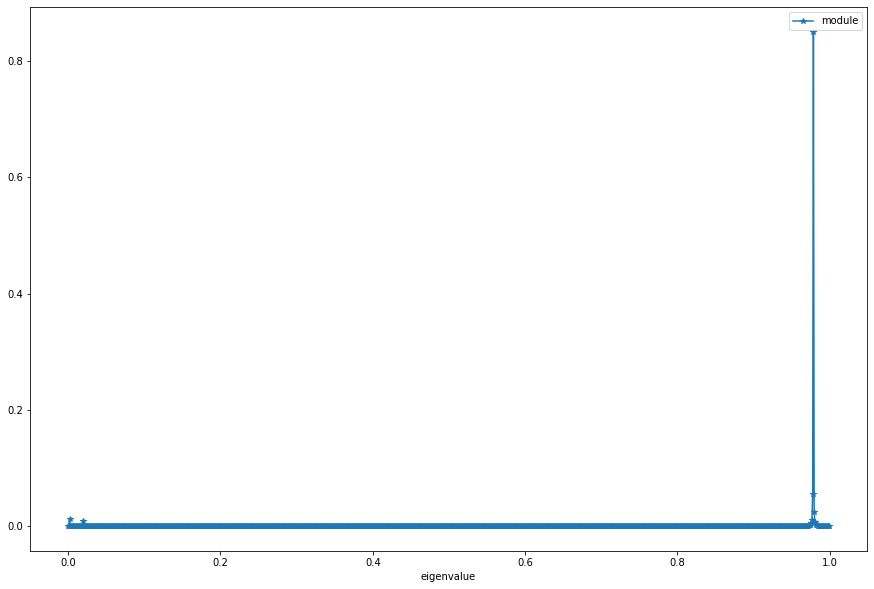

In [11]:
qpca.eigenvectors_reconstruction(n_shots=1000000,n_repetitions=1,plot_peaks=True)

In [12]:
qpca.quantum_input_matrix_reconstruction()

array([[1.36780216, 1.59321697, 1.29460802],
       [1.59321697, 1.89242608, 1.56191731],
       [1.29460802, 1.56191731, 1.36063532]])

In [13]:
qpca.true_input_matrix,np.linalg.eig(qpca.input_matrix)

(array([[0.29666337, 0.34422543, 0.27702034],
        [0.34422543, 0.4084675 , 0.33558223],
        [0.27702034, 0.33558223, 0.29486913]]),
 (array([0.97831668, 0.00196037, 0.01972296, 0.        ]),
  array([[-0.54387379, -0.61004165, -0.57623822,  0.        ],
         [-0.64480462,  0.74326569, -0.17827818,  0.        ],
         [-0.53705522, -0.27460023,  0.7976004 ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])))